In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [59]:
revenue = pd.read_csv('../data/clean_revenue.csv')

In [60]:
revenue.head()

,Cabin (group),Cabin,Channel Type,Sub Channel Type,Ticket Type,Point of Sale,Rev (GBP) CY,Rev (GBP) PY,Passengers CY,Passengers PY,Average Fare (GBP) CY,Average Fare (GBP) PY
0,J,J,Consumer,Consolidator,IT Net,GB,15681.0,5103.0,13.0,6.0,1206.0,851.0
1,J,J,Consumer,Consolidator,Published,NorAm,5983.0,3391.0,13.0,4.0,460.0,848.0
2,J,J,Consumer,Consolidator,Published,Other,1974.0,6605.0,4.0,12.0,494.0,550.0
3,J,J,Consumer,Consolidator,SME,GB,1947.0,1747.0,6.0,1.0,272.0,1747.0
4,J,J,Consumer,Consolidator,SO Net,NorAm,7521.0,2250.0,14.0,2.0,537.0,1125.0


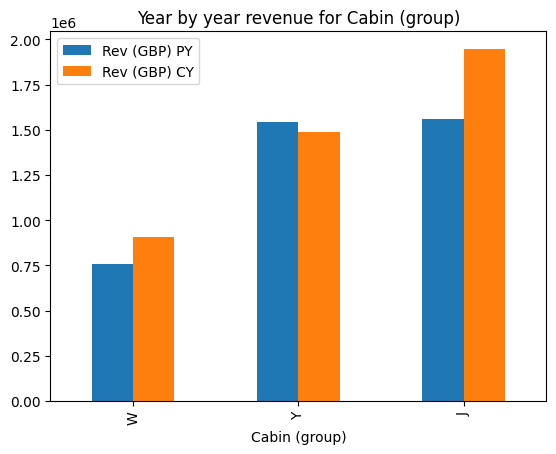

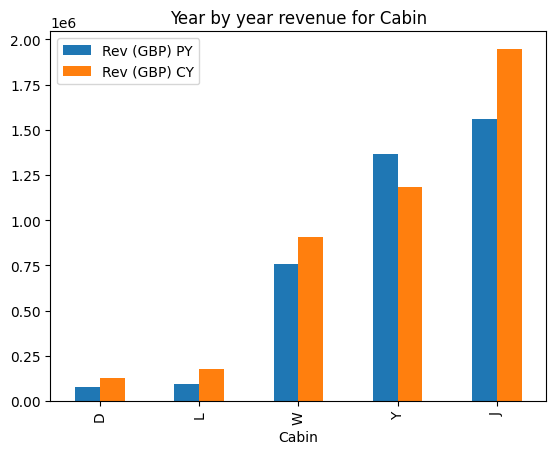

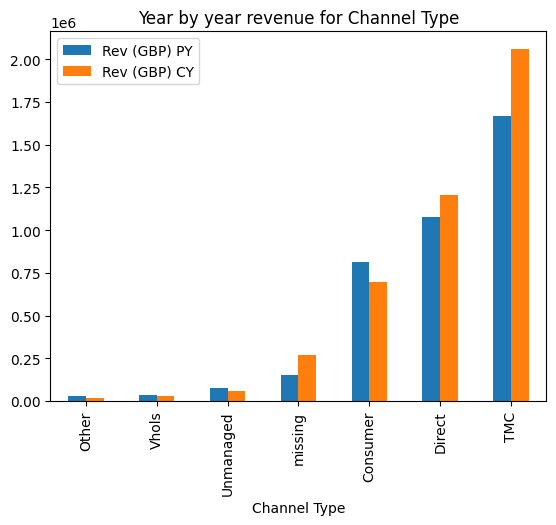

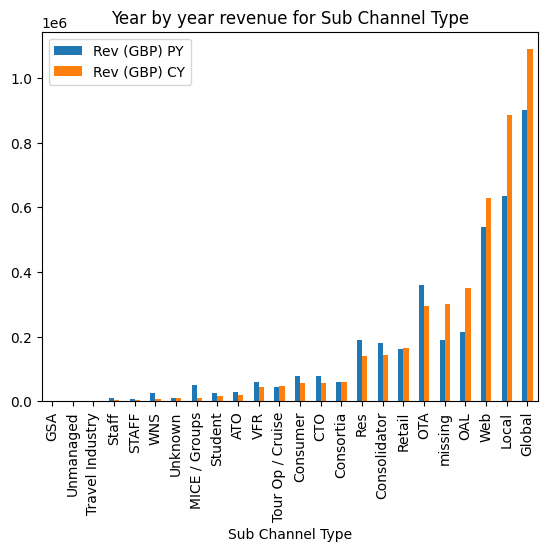

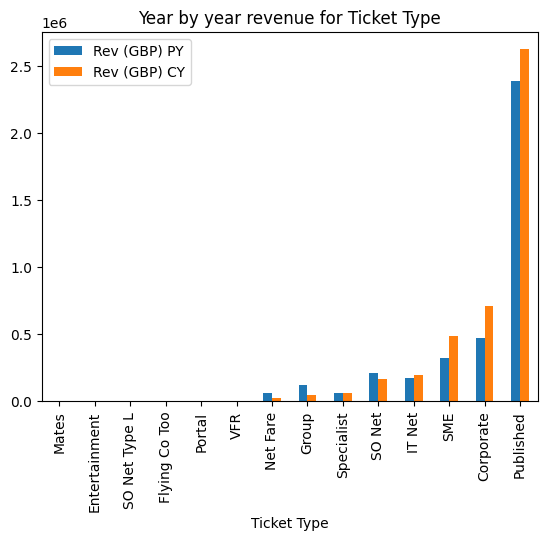

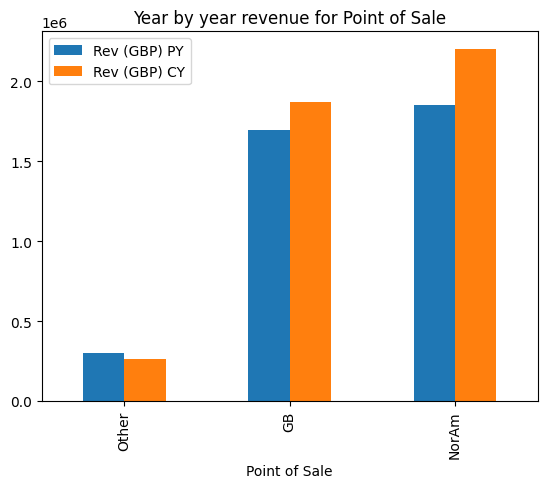

In [61]:
categorical_columns = ['Cabin (group)', 'Cabin', 'Channel Type', 'Sub Channel Type', 'Ticket Type' , 'Point of Sale']
for col in categorical_columns:
    revenue[[col, 'Rev (GBP) PY', 'Rev (GBP) CY']].groupby(col).sum().sort_values(by='Rev (GBP) CY').plot(kind='bar')
    plt.title(f'Year by year revenue for {col}');

## percentage change of revenue

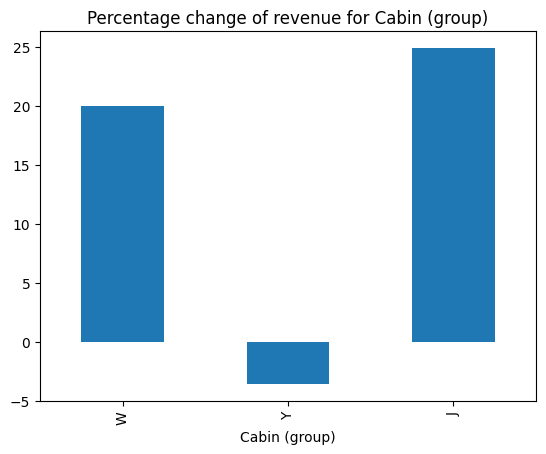

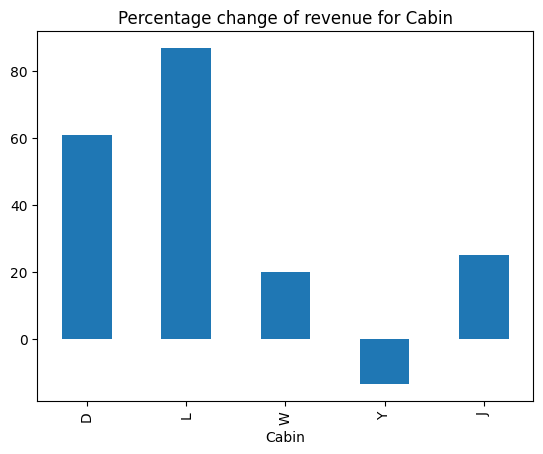

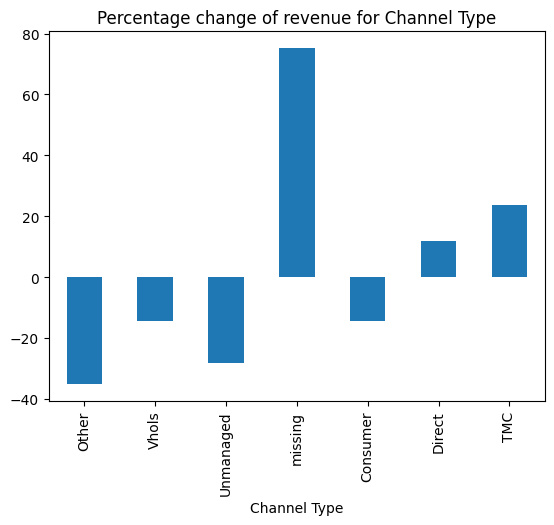

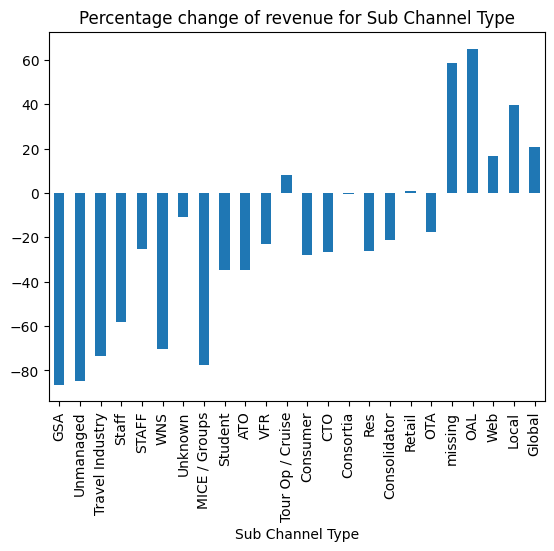

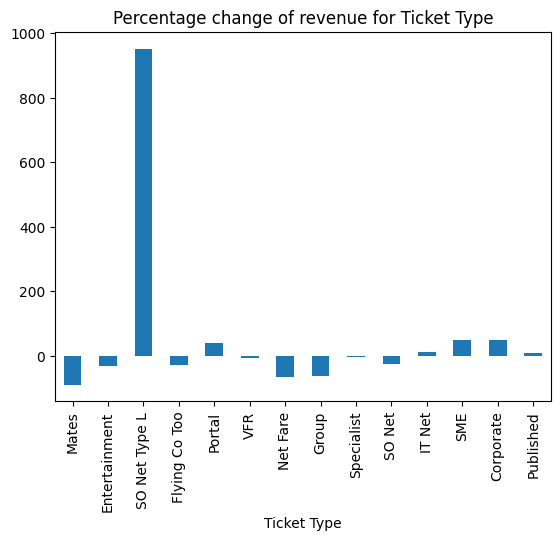

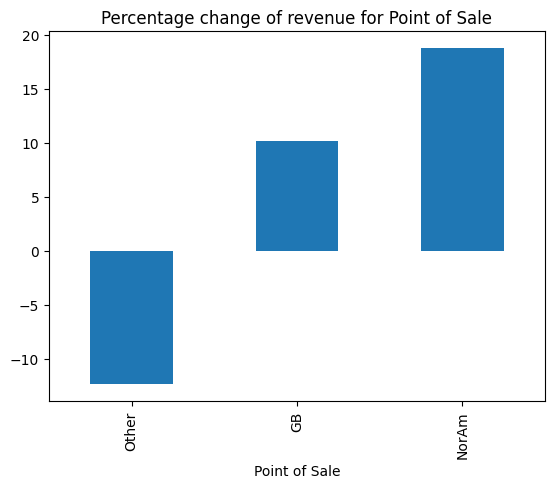

In [62]:
for col in categorical_columns:
    df = revenue[[col, 'Rev (GBP) PY', 'Rev (GBP) CY']]\
            .groupby(col)\
            .sum()\
            .sort_values(by='Rev (GBP) CY')\
            .apply(lambda row: (row['Rev (GBP) CY']-row['Rev (GBP) PY'])*100/row['Rev (GBP) PY'], axis=1)
            
    df.plot(kind='bar')
    plt.title(f'Percentage change of revenue for {col}')
    plt.show()

In [63]:
df

Point of Sale
Other   -12.374089
GB       10.197264
NorAm    18.768474
dtype: float64